In [7]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import Slider, Button

## Exercício 1: Implementando uma árvore de decisão simples

In [8]:
# Conjunto de dados de treinamento

X_train = np.array([[1, 1, 1],
                    [1, 0, 1],
                    [1, 0, 0],
                    [1, 0, 0],
                    [1, 1, 1],
                    [0, 1, 1],
					[0, 0, 0],
					[1, 0, 1],
					[0, 1, 0],
					[1, 0, 0]])

y_train = np.array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0])

Será necessário definir as seguintes funções:

- `compute_entropy` calcula e retorna a entropia de um conjunto de rótulos.
- `split_dataset` divide os dados em um nó segundo o critério de divisão (feature e threshold);
- `compute_information_gain` calcula o ganho de informação;
- `get_best_split` encontra a melhor divisão possível para um nó;
- `build_tree_recursive` constrói a árvore de decisão **recursivamente**.

A entropia é dada por:

$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$

onde $p_1$ é a proporção de exemplos positivos no nó.

O ganho de informação é dado por:

$$\text{Information Gain} = H(p_1^\text{node})- (w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$$

onde 
- $H(p_1^\text{node})$ é a entropia no nó antes da divisão;
- $H(p_1^\text{left})$ e $H(p_1^\text{right})$ são as entropias nos ramos esquerdo e direito resultantes da divisão;
- $w^{\text{left}}$ e $w^{\text{right}}$ são a proporção de exemplos nos ramos esquerdo e direito, respectivamente.


**Observações sobre a função** `compute_entropy`:
- Por questões de estabilidade, defina `entropy = 0` se `p_1 = 0` ou `p_1 = 1`;
- Cheque que há dados no nó. Retorne `0` se não houver.

In [9]:
def compute_entropy(y):
    """
    Computes the entropy for a given node.
    
    Args:
       y (ndarray): Numpy array indicating whether each example at a node is
           correct (`1`) or incorrect (`0`)
       
    Returns:
        entropy (float): Entropy at that node
        
    """
    if len(y) == 0:
        return 0
    
    p_1 = np.sum(y == 1) / len(y)
    
    # Por estabilidade, define entropy = 0 se p_1 = 0 ou p_1 = 1
    if p_1 == 0 or p_1 == 1:
        entropy = 0
    else:
        entropy = -p_1 * np.log2(p_1) - (1 - p_1) * np.log2(1 - p_1)
    
    return entropy


def split_dataset(X, node_indices, feature):
    """
    Splits the data at the given node into
    left and right branches
    
    Args:
        X (ndarray):             Data matrix of shape(n_samples, n_features)
        node_indices (list):     List containing the active indices. I.e, the samples being considered at this step.
        feature (int):           Index of feature to split on
    
    Returns:
        left_indices (list):     Indices with feature value == 1
        right_indices (list):    Indices with feature value == 0
    """
    
    left_indices = []
    right_indices = []
    
    for i in node_indices:
        if X[i][feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
        
    return left_indices, right_indices


def compute_information_gain(X, y, node_indices, feature):
    
    """
    Compute the information of splitting the node on a given feature
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
        feature (int):           Index of feature to split on
   
    Returns:
        cost (float):        Cost computed
    
    """
    left_indices, right_indices = split_dataset(X, node_indices, feature)
    y_node = y[node_indices]
    y_left = y[left_indices]
    y_right = y[right_indices]

    node_entropy = compute_entropy(y_node)
    left_entropy = compute_entropy(y_left)
    right_entropy = compute_entropy(y_right)
    
    w_left = len(left_indices) / len(node_indices)
    w_right = len(right_indices) / len(node_indices)
    information_gain = node_entropy - (w_left * left_entropy + w_right * right_entropy)
    
    return information_gain


def get_best_split(X, y, node_indices):
    """
    Returns the optimal feature and threshold value
    to split the node data 

    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.

    Returns:
        best_feature (int):     The index of the best feature to split
    """
    
    num_features = X.shape[1]
    best_feature = -1
    max_info_gain = 0
    

    for feature in range(num_features):
        info_gain = compute_information_gain(X, y, node_indices, feature)
        
        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_feature = feature

    return best_feature


def build_tree_recursive(X, y, node_indices, branch_name, max_depth, current_depth, tree):
    """
    Build a tree using the recursive algorithm that split the dataset into 2 subgroups at each node.
    This function just prints the tree.
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
        branch_name (string):   Name of the branch. ['Root', 'Left', 'Right']
        max_depth (int):        Max depth of the resulting tree. 
        current_depth (int):    Current depth. Parameter used during recursive call.
    """
    y_node = y[node_indices]
    entropy = compute_entropy(y_node)
    num_positives = np.sum(y_node == 1)
    num_samples = len(y_node)
    indent = "  " * current_depth
    
    print(f"{indent}{branch_name}: [Samples: {num_samples}, Positives: {num_positives}, Entropy: {entropy:.4f}]")
    
    if current_depth == max_depth or entropy == 0:
        tree.append({
            'depth': current_depth,
            'branch': branch_name,
            'samples': num_samples,
            'positives': num_positives,
            'entropy': entropy,
            'is_leaf': True
        })
        return tree
    
    best_feature = get_best_split(X, y, node_indices)
    
    print(f"{indent}  -> Split on feature {best_feature}")
    
    tree.append({
        'depth': current_depth,
        'branch': branch_name,
        'samples': num_samples,
        'positives': num_positives,
        'entropy': entropy,
        'is_leaf': False,
        'split_feature': best_feature
    })
    
    left_indices, right_indices = split_dataset(X, node_indices, best_feature)
    
    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth + 1, tree)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth + 1, tree)
    
    return tree

In [10]:
tree = []
build_tree_recursive(X_train, y_train,
                     list(range(len(X_train))),
                     "Root",
                     max_depth=2,
                     current_depth=0,
                     tree=tree)

Root: [Samples: 10, Positives: 5, Entropy: 1.0000]
  -> Split on feature 2
  Left: [Samples: 5, Positives: 4, Entropy: 0.7219]
    -> Split on feature 0
    Left: [Samples: 4, Positives: 4, Entropy: 0.0000]
    Right: [Samples: 1, Positives: 0, Entropy: 0.0000]
  Right: [Samples: 5, Positives: 1, Entropy: 0.7219]
    -> Split on feature 1
    Left: [Samples: 1, Positives: 1, Entropy: 0.0000]
    Right: [Samples: 4, Positives: 0, Entropy: 0.0000]


[{'depth': 0,
  'branch': 'Root',
  'samples': 10,
  'positives': np.int64(5),
  'entropy': np.float64(1.0),
  'is_leaf': False,
  'split_feature': 2},
 {'depth': 1,
  'branch': 'Left',
  'samples': 5,
  'positives': np.int64(4),
  'entropy': np.float64(0.7219280948873623),
  'is_leaf': False,
  'split_feature': 0},
 {'depth': 2,
  'branch': 'Left',
  'samples': 4,
  'positives': np.int64(4),
  'entropy': 0,
  'is_leaf': True},
 {'depth': 2,
  'branch': 'Right',
  'samples': 1,
  'positives': np.int64(0),
  'entropy': 0,
  'is_leaf': True},
 {'depth': 1,
  'branch': 'Right',
  'samples': 5,
  'positives': np.int64(1),
  'entropy': np.float64(0.7219280948873623),
  'is_leaf': False,
  'split_feature': 1},
 {'depth': 2,
  'branch': 'Left',
  'samples': 1,
  'positives': np.int64(1),
  'entropy': 0,
  'is_leaf': True},
 {'depth': 2,
  'branch': 'Right',
  'samples': 4,
  'positives': np.int64(0),
  'entropy': 0,
  'is_leaf': True}]

# Parte feita na aula sem notebook descrevendo

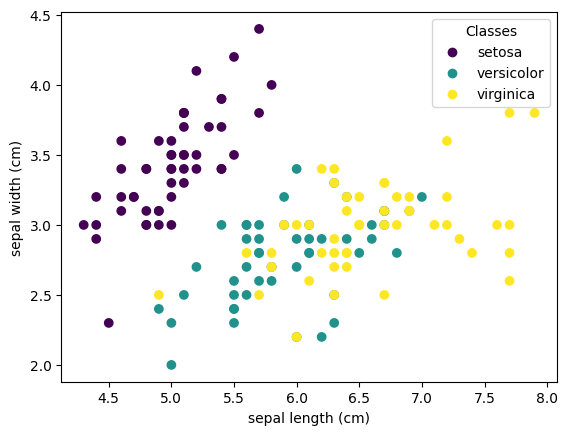

The predicted class for the flower with features [[5.0, 1.5, 0.5, 3.5]] is: setosa


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [11]:
import sklearn
from sklearn import datasets, model_selection, tree
import matplotlib.pyplot
import graphviz
import io

iris = datasets.load_iris()
ax = matplotlib.pyplot.subplot()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
legend_elements = scatter.legend_elements()
ax.legend(legend_elements[0], iris.target_names, title="Classes")
matplotlib.pyplot.show()

X_train_iris, X_test_iris, y_train_iris, y_test_iris = model_selection.train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
classifier = sklearn.tree.DecisionTreeClassifier(max_depth=3, random_state=42)
classifier = classifier.fit(X_train_iris, y_train_iris)
sample_flower = [[5.0, 1.5, 0.5, 3.5]]
predicted_class = classifier.predict(sample_flower)
print(f"The predicted class for the flower with features {sample_flower} is: {iris.target_names[predicted_class][0]}")
# mostra a arvore
dot_data = io.StringIO()
tree.export_graphviz(classifier, out_file=dot_data, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,
                     filled=True, rounded=True,  
                     special_characters=True)
dot_data = dot_data.getvalue()
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree")
graph.view()
